# DISTANCE BASED CLASSIFICATION ON IRIS DATASET

## IMPORTING MODULES

In [1]:
import pandas as pd     #To read the dataset
import numpy as np      #To perform operations on array
import os               #To handle some files if necessayr
import matplotlib.pyplot as plt #To visualize data in the form of graphs
import sys
import statistics as st
MAX = sys.maxsize

### MEAN CALCULATION

In [2]:
def mean_0(X):
    # Calculates mean of each column
    m,n = X.shape
    sums = 0
    for row in X:
        sums += row
    return sums/m

## DISTANCE METRICS

### Euclidean Distance


$ d(x,y) = \sqrt{(x_1-y_1)^2+(x_2-y_2)^2+...+(x_n-y_n)^2} $

In [3]:
def euclidean_distance(p1,p2):
    distance = pow(sum([(a - b) ** 2 for a, b in zip(p1, p2)]),0.5)
    return distance

### City Block/Manhattan Distance

$ d(x,y)= |x_1 - x_2| + |y_1 - y_2| + ... + |x_n - y_n| $

In [4]:
def manhattan_distance(p1,p2):
    distance = 0
    for i in range(len(p1)):
        distance += abs(p1[i] - p2[i])
    return distance

### Chess Board Distance

$d(x,y) = max(|x_1 - x_2|,|y_1 - y_2|)$

In [5]:
def chessboard_distance(p1,p2):
    distance = abs(p1[0] - p2[0])
    for i in range(1,len(p1)):
        distance = max(distance,abs(p1[i] - p2[i]))
    return distance

### Mahalanobis Distance

$ d(x,y)=(x-y)^T.C.(x-y) $

In [6]:
def calcCov(x, y):
    mean_x, mean_y = x.mean(), y.mean()
    n = len(x)
    return sum((x - mean_x) * (y - mean_y)) / n
def cov(data):
    rows, cols = data.shape
    cov_mat = np.zeros((cols, cols))
 
    for i in range(cols):
 
        for j in range(cols):
            # store the value in the matrix
            cov_mat[i][j] = calcCov(data[:, i], data[:, j])
 
    return cov_mat

In [7]:
def mahalanobis_distance(p1,p2,X): #p1 is model, p2 is the test point
    # X is inverse cov matrix
    distance = np.dot(np.dot(np.subtract(p2,p1).T,np.array(X)),np.subtract(p2,p1))
    return distance

### Correlation Distance

$ d(x,y) = 1 - (x - Mean[x]).(y - Mean[y])/(Norm(x - Mean[x])Norm(y - Mean[]y)) $ 

In [8]:
def correlation_distance(p1,p2):
    norm_p1 = 0
    norm_p2 = 0
    for i in range(len(p1)):
        norm_p1 += (p1[i] - st.mean(p1))**2
        norm_p2 += (p2[i] - st.mean(p2))**2
    norm_p1 = norm_p1**0.5
    norm_p2 = norm_p2**0.5
    s = 0
    for i in range(len(p1)):
        s += (p1[i] - st.mean(p1))*(p2[i] - st.mean(p2))
    distance = 1 - s/(norm_p1*norm_p2)
    return distance

### Cosine Distance

$ \text{cosine distance} = 1 - \text{cosine similarity}(A,B)$

$  \text{cosine similarity} = \cos(\theta) = {\mathbf{A} \cdot \mathbf{B} \over \|\mathbf{A}\| \|\mathbf{B}\|} =\large \frac{ x_1 * x_2 + y_1 * y_2  }{ \sqrt{x_1^2+y_1^2 }  \sqrt{x_2^2 + y_2^2}}$

In [9]:
def cosine_distance(p1,p2):
    norm_p1 = 0
    norm_p2 = 0
    for i in range(len(p1)):
        norm_p1 += p1[i]**2
        norm_p2 += p2[i]**2
    norm_p1 = norm_p1**0.5
    norm_p2 = norm_p2**0.5
    s = 0
    for i in range(len(p1)):
        s += p1[i]*p2[i]
    distance = 1 - s/(norm_p1*norm_p2)
    return distance

### Bray-Curtis Distance

$ \large BC_d=\sum_{i=0}^{n} \frac{|x_i-x_j|}{(x_i-x_j)} $

In [10]:
def bray_curtis_distance(p1,p2):
    s1 = 0
    s2 = 0
    for i in range(len(p1)):
        s1 += abs(p1[i] - p2[i])
        s2 += abs(p1[i] + p2[i])
    distance = s1/s2
    return distance

### Canberra Distance

$ \large d(p,q) = \sum_{i=0}^{n} \frac{|p_i-q_i|}{|p_i|+|q_i|} $

In [11]:
def canberra_distance(p1,p2):
    distance = 0
    for i in range(len(p1)):
        s1 = abs(p1[i] - p2[i])
        s2 = abs(p1[i] + p2[i])
        distance += s1/s2
    return distance

### Minkowski Distance

$ \large d(x,y) = (|x_1 - y_1|^p + |x_2 - y_2|^p)^{1/p}$

In [12]:
def minkowski_distance(p1,p2,p):
    s = 0
    for i in range(len(p1)):
        s += abs(p1[i] - p2[i])**p
    distance = s**(1/p)
    return distance

### MISCLASSIFICATION ERROR RATE

In [13]:
def MER_Error(X,Y):
    correct_count = 0
    for i in range(len(X)):
        if(X[i] == Y[i]):
            correct_count = correct_count + 1
    MER_val = 1 - (correct_count/len(X))
    return MER_val

## LOADING DATASET

In [14]:
df = pd.read_csv("iris.data")

In [15]:
print(df['Species'].value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


## PREPROCESSING

Data preprocessing is a process of preparing the raw data and making it suitable for a machine learning model.

In [16]:
#Check for null value --If NULL value, we can replace it either with mean, median or mode.
print(df.isnull().sum())

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


## EXPLORATORY DATA ANALYSIS

PLOTTING THE DATA USING SCATTER-PLOT

In [17]:
colors = ['red','green','blue']
species = ['Iris-virginica', 'Iris-versicolor','Iris-setosa']

#### Plotting scatterplot for features sepal-length and sepal-width

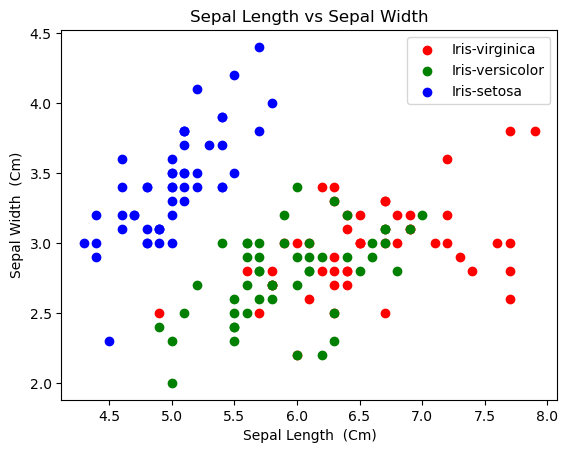

In [18]:
for i in range (3):
    x = df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])
plt.title('Sepal Length vs Sepal Width')
plt.xlabel("Sepal Length  (Cm)")
plt.ylabel("Sepal Width  (Cm)")
plt.legend()

#### Plotting scatterplot for features petal-length and petal-width

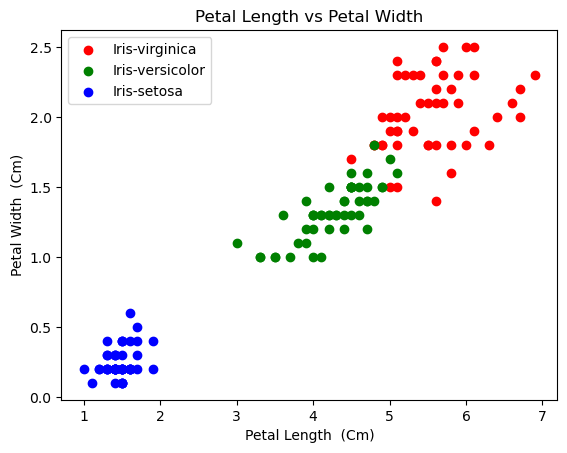

In [19]:
#Plot scatterplot for petal-length and petal-width
for i in range (3):
    x = df[df['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])
plt.title('Petal Length vs Petal Width')
plt.xlabel("Petal Length  (Cm)")
plt.ylabel("Petal Width  (Cm)")
plt.legend()

#### Plotting scatterplot for features sepal-length and petal-length

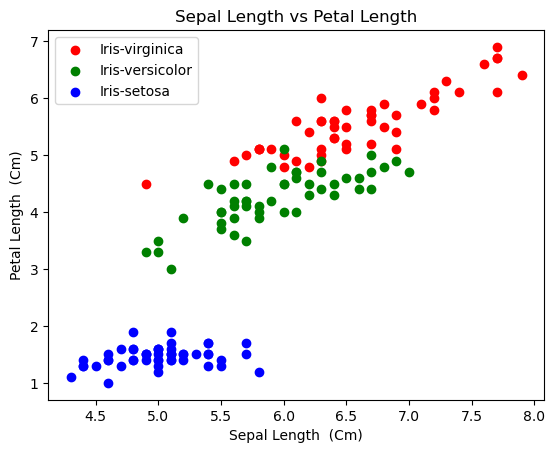

In [20]:
#Plot scatterplot for sepal-length and petal-length
for i in range (3):
    x = df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c=colors[i], label=species[i])
plt.title('Sepal Length vs Petal Length')
plt.xlabel("Sepal Length  (Cm)")
plt.ylabel("Petal Length  (Cm)")
plt.legend()

#### Plotting scatterplot for features sepal-width and petal-width

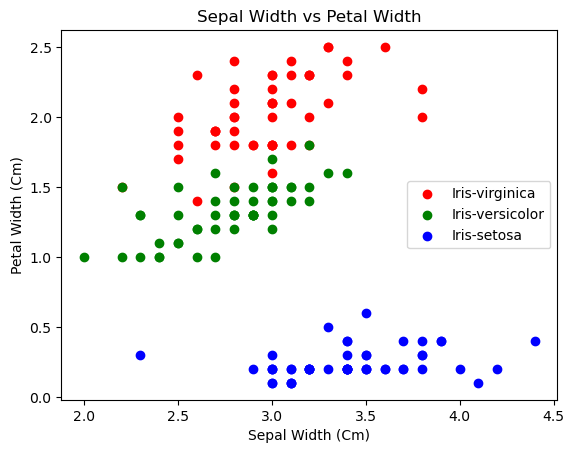

In [21]:
#Plot scatterplot for sepal-width and petal-width
for i in range (3):
    x = df[df['Species']==species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])
plt.title('Sepal Width vs Petal Width')
plt.xlabel("Sepal Width (Cm)")
plt.ylabel("Petal Width (Cm)")
plt.legend()

## LABEL ENCODER

Dataset might contain labels in one or more columns. These labels may be numbers or string. Label Encoding refers to converting the labels into a numeric form.

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
df['Species'] = le.fit_transform(df['Species'])
# Iris-setosa 0
# Iris-versicolor 1
# Iris-virginica 2

## SPLIT INTO TRAIN AND TEST DATA

In [24]:
# X -> Features SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm 
# Y -> Labels 0,1,2
X = df.drop(columns=['Species']) #Drops the Species column and stores it in variable X
Y = df['Species'] #Stores the column Species in Y

training - 60% testing - 40%

In [25]:
# TRAINING DATA
C0 = X[0:30]
C1 = X[50:80]
C2 = X[100:130]

X_train = np.concatenate([C0,C1,C2],axis=0)    #features
Y_train = np.concatenate([Y[0:30], Y[50:80], Y[100:130]],axis=0)  #labels

In [26]:
# TESTING DATA
X_test = np.concatenate([X[30:50],X[80:100],X[130:150]],axis=0)    #features
Y_test = np.concatenate([Y[30:50], Y[80:100], Y[130:150]],axis=0)  #labels

## TRAINING PHASE

Training phase involves finding the centroid of each class

In [27]:
C0 = np.array(X[0:30])
C1 = np.array(X[50:80])
C2 = np.array(X[100:130])

In [28]:
# Training Phase
l1 = mean_0(C0)
l2 = mean_0(C1)
l3 = mean_0(C2)
model = np.array([l1,l2,l3])
print(model)

[[5.02666667 3.45       1.47333333 0.24666667]
 [6.07       2.79       4.33333333 1.35333333]
 [6.58333333 2.93333333 5.60333333 2.00666667]]


## PLOTTING CENTROID

Only train-data is plotted along with centroid; as the centroid is calculated based on the train-data.
The centroid might change if we change the train-data.

#### Centroid Plot in Sepal-Length vs Sepal-Width Graph

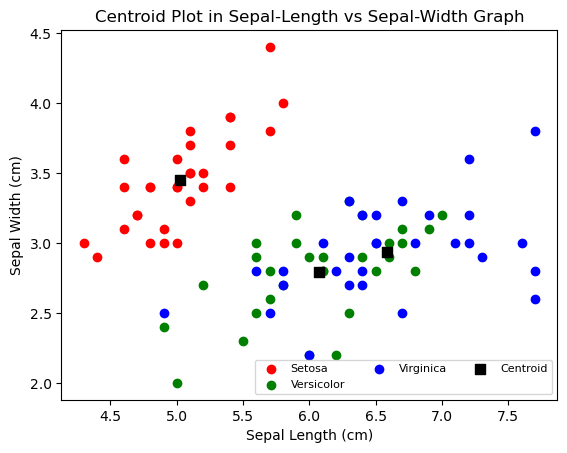

In [29]:
setosa_plot = plt.scatter(X_train[0:30,0], X_train[0:30,1],color='red')     # 0-30 in X_train belongs to setosa
versicolor_plot = plt.scatter(X_train[30:60,0], X_train[30:60,1],color='green')   # 30-60 in X_train belongsto Versicolor
virginica_plot = plt.scatter(X_train[60:90,0], X_train[60:90,1],color='blue')    # 60-90 in X_train belongs to Virginica
centroid_plot = plt.scatter(model[:,0],model[:,1],color='black',marker=',',s=50)
plt.legend((setosa_plot,versicolor_plot,virginica_plot,centroid_plot),('Setosa', 'Versicolor','Virginica','Centroid'),numpoints=1, loc='lower right', ncol=3, fontsize=8)
plt.title("Centroid Plot in Sepal-Length vs Sepal-Width Graph")
plt.xlabel('Sepal Length (cm)')  
plt.ylabel('Sepal Width (cm)')  
plt.show()

#### Centroid Plot in Petal-Length vs Petal-Width Graph

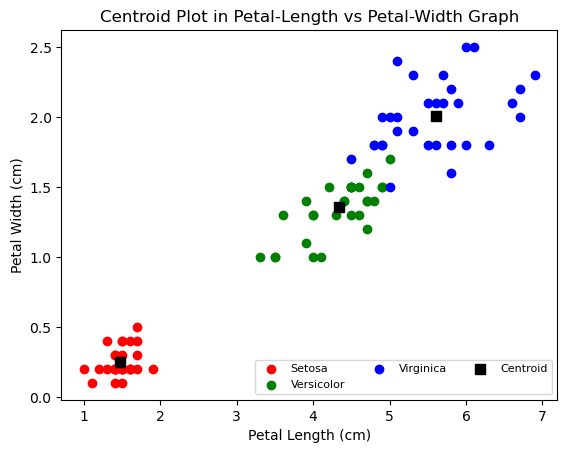

In [30]:
setosa_plot = plt.scatter(X_train[0:30,2], X_train[0:30,3],color='red')     # 0-30 in X_train belongs to setosa
versicolor_plot = plt.scatter(X_train[30:60,2], X_train[30:60,3],color='green')   # 30-60 in X_train belongsto Versicolor
virginica_plot = plt.scatter(X_train[60:90,2], X_train[60:90,3],color='blue')    # 60-90 in X_train belongs to Virginica
centroid_plot = plt.scatter(model[:,2],model[:,3],color='black',marker=',',s=50)
plt.legend((setosa_plot,versicolor_plot,virginica_plot,centroid_plot),('Setosa', 'Versicolor','Virginica','Centroid'),numpoints=1, loc='lower right', ncol=3, fontsize=8)
plt.title("Centroid Plot in Petal-Length vs Petal-Width Graph")
plt.xlabel('Petal Length (cm)')  
plt.ylabel('Petal Width (cm)')  
plt.show()

#### Centroid Plot in Sepal-Length vs Petal-Length Graph

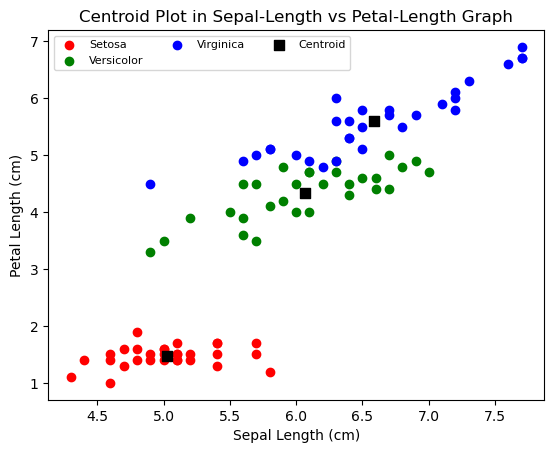

In [31]:
setosa_plot = plt.scatter(X_train[0:30,0], X_train[0:30,2],color='red')     # 0-30 in X_train belongs to setosa
versicolor_plot = plt.scatter(X_train[30:60,0], X_train[30:60,2],color='green')   # 30-60 in X_train belongsto Versicolor
virginica_plot = plt.scatter(X_train[60:90,0], X_train[60:90,2],color='blue')    # 60-90 in X_train belongs to Virginica
centroid_plot = plt.scatter(model[:,0],model[:,2],color='black',marker=',',s=50)
plt.legend((setosa_plot,versicolor_plot,virginica_plot,centroid_plot),('Setosa', 'Versicolor','Virginica','Centroid'),numpoints=1, loc='best', ncol=3, fontsize=8)
plt.title("Centroid Plot in Sepal-Length vs Petal-Length Graph")
plt.xlabel('Sepal Length (cm)')  
plt.ylabel('Petal Length (cm)')  
plt.show()

#### Centroid Plot in Sepal-Width vs Petal-Width Graph

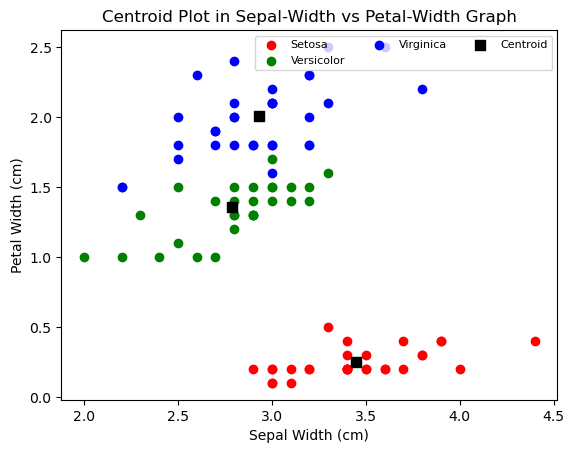

In [32]:
setosa_plot = plt.scatter(X_train[0:30,1], X_train[0:30,3],color='red')     # 0-30 in X_train belongs to setosa
versicolor_plot = plt.scatter(X_train[30:60,1], X_train[30:60,3],color='green')   # 30-60 in X_train belongsto Versicolor
virginica_plot = plt.scatter(X_train[60:90,1], X_train[60:90,3],color='blue')    # 60-90 in X_train belongs to Virginica
centroid_plot = plt.scatter(model[:,1],model[:,3],color='black',marker=',',s=50)
plt.legend((setosa_plot,versicolor_plot,virginica_plot,centroid_plot),('Setosa', 'Versicolor','Virginica','Centroid'),numpoints=1, loc='best', ncol=3, fontsize=8)
plt.title("Centroid Plot in Sepal-Width vs Petal-Width Graph")
plt.xlabel('Sepal Width (cm)')  
plt.ylabel('Petal Width (cm)')  
plt.show()

## TESTING PHASE

### Euclidean Distance - Analysis

In [33]:
# minimum distance
min_dist = MAX

# predicted labels
predicted = [0]*len(X_test)
#Actual label -> Y_test

for i in range (len(X_test)):
    for j in range(0,3):
        distance = euclidean_distance([model[j,2],model[j,3]],[X_test[i,2],X_test[i,3]])
        
        if(distance < min_dist):
            min_dist = distance
            lbl = j;
    
    predicted[i] = lbl;
    
    #reset min_dist
    min_dist = MAX  

In [34]:
# Displaying Predicted Labels against True Labels
dict = {'True Labels' : Y_test,
        'Predicted Labels' : predicted}
df2 = pd.DataFrame(dict)

print('Comparision of True Class Labels and Predicted Class Labels\n')
print(df2)


Comparision of True Class Labels and Predicted Class Labels

    True Labels  Predicted Labels
0             0                 0
1             0                 0
2             0                 0
3             0                 0
4             0                 0
5             0                 0
6             0                 0
7             0                 0
8             0                 0
9             0                 0
10            0                 0
11            0                 0
12            0                 0
13            0                 0
14            0                 0
15            0                 0
16            0                 0
17            0                 0
18            0                 0
19            0                 0
20            1                 1
21            1                 1
22            1                 1
23            1                 2
24            1                 1
25            1                 1
26            1      

In [35]:
#Misclassification Error Rate of Euclidean Distance Model
MER = MER_Error(Y_test,predicted)
print("MER of Euclidean Distance Model",MER)

MER of Euclidean Distance Model 0.033333333333333326


In [36]:
#Accuracy of Euclidean Distance Model
Accuracy = (1-MER)*100
print("Accuracy of Euclidean Distance Model(in %) = {:.2f}".format(Accuracy,2))

Accuracy of Euclidean Distance Model(in %) = 96.67


### Analysis using a Sample Test Point

In [37]:
# Take a sample test point and plot the distance from each centroids. 
# Indicate the true class and predicted class. (For Euclidean distance)
import random
# Select a random test plot
pt = random.randint(0,len(Y_test))
print("Sample Test Point Id",pt)
print("True Class of Sample Test Point -> ",Y_test[pt])
print("Predicted Class of Sample Test Point -> ",predicted[pt])

Sample Test Point Id 1
True Class of Sample Test Point ->  0
Predicted Class of Sample Test Point ->  0


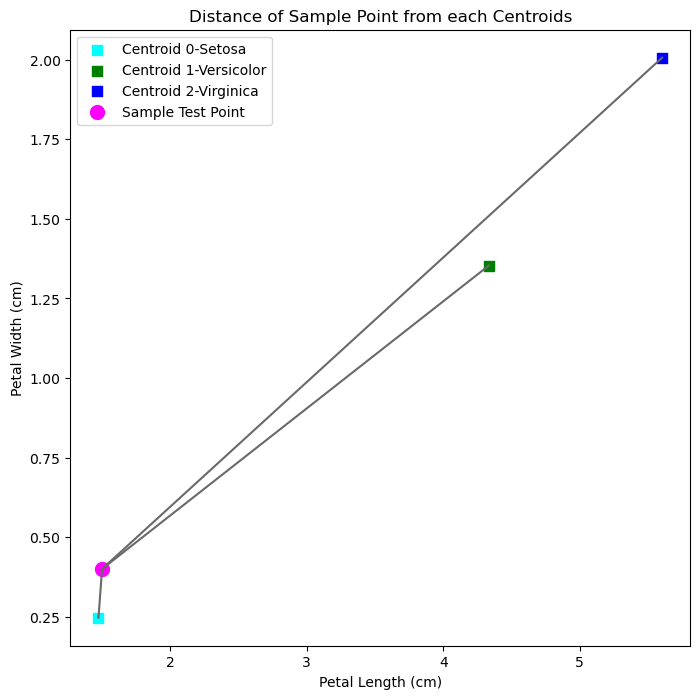

In [38]:
# Plotting distance of sample test point from each centroids.
# Petal Length vs Petal Width

c0_pt = [model[0,2],model[0,3]]
c1_pt = [model[1,2],model[1,3]]
c2_pt = [model[2,2],model[2,3]]
test_pt = [X_test[pt,2],X_test[pt,3]]

plt.figure(figsize=(8,8))
#Plot Distance
plt.plot([c0_pt[0],test_pt[0]],[c0_pt[1],test_pt[1]],color='dimgray')
plt.plot([c1_pt[0],test_pt[0]],[c1_pt[1],test_pt[1]],color='dimgray')
plt.plot([c2_pt[0],test_pt[0]],[c2_pt[1],test_pt[1]],color='dimgray')
#Plot Points
plt.scatter(c0_pt[0],c0_pt[1],color='cyan',label='Centroid 0-Setosa',marker=',',s=50)
plt.scatter(c1_pt[0],c1_pt[1],color='green',label='Centroid 1-Versicolor',marker=',',s=50)
plt.scatter(c2_pt[0],c2_pt[1],color='blue',label='Centroid 2-Virginica',marker=',',s=50)
plt.scatter(test_pt[0],test_pt[1],color='magenta',label='Sample Test Point',s=100)

plt.legend()
plt.title("Distance of Sample Point from each Centroids")
plt.xlabel('Petal Length (cm)')  
plt.ylabel('Petal Width (cm)')  
plt.show()

### Comparison of Different Distance Metrics

In [39]:
def select_distance(p1,p2,distance_type,X_train=None):
# returns the calculated distance based on the type of distance provided
    if(distance_type == "euclidean"):
        return euclidean_distance(p1,p2)
    elif(distance_type == "manhattan" or distance_type == "cityblock"):
        return manhattan_distance(p1,p2)
    elif(distance_type == "chessboard" or distance_type == "chebyshev"):
        return chessboard_distance(p1,p2)
    elif(distance_type == "minkowski"):
        return minkowski_distance(p1,p2,3)
    elif(distance_type == "mahalanobis"):
        X = cov(X_train)
        X = np.linalg.inv(X)
        return mahalanobis_distance(p1,p2,X)
    elif(distance_type == "correlation"):
        return correlation_distance(p1,p2)
    elif(distance_type == "cosine"):
        return cosine_distance(p1,p2)
    elif(distance_type == "bray_curtis"):
        return bray_curtis_distance(p1,p2)
    elif(distance_type == "canberra"):
        return canberra_distance(p1,p2)
    else:
        return "None"

In [40]:
def distance_classifer(X_test,actual,model,dtype,X_train=None):
    # X_test->test points, actual->actual labels for test points
    # model->centroids, dtype->type of distance metric
    # X_train->if necessary,to calculate the covariance matrix
    predicted = [0]*len(X_test)
    min_dist = MAX
    for i in range (len(X_test)):
        for j in range(0,len(model)):
            distance = select_distance([model[j,2],model[j,3]],[X_test[i,2],X_test[i,3]],dtype,X_train)          
            # invalid distance
            if(dtype == None):
                return None
            # finding the minimum distance  
            if(distance < min_dist):
                min_dist = distance
                lbl = j;
        # store predicted label
        predicted[i] = lbl;
        #reset min_dist
        min_dist = MAX
    #Calculate MER of model using that particular distance metrics 
    mer = MER_Error(actual,predicted)    
    return mer

In [41]:
# X_test->test points, Y->Actual labels for test points
# model->centroids
euclidean = distance_classifer(X_test,Y_test,model,"euclidean")
manhattan = distance_classifer(X_test,Y_test,model,"manhattan")
chessboard = distance_classifer(X_test,Y_test,model,"chessboard")
cosine = distance_classifer(X_test,Y_test,model,"cosine")
mahalanobis = distance_classifer(X_test,Y_test,model,"mahalanobis",X_train[:,2:])
correlation = distance_classifer(X_test,Y_test,model,"correlation")
bray_curtis = distance_classifer(X_test,Y_test,model,"bray_curtis")
canberra = distance_classifer(X_test,Y_test,model,"canberra")
minkowski = distance_classifer(X_test,Y_test,model,"minkowski")

# list of MER and accuracy, for each model
euclidean = [euclidean,(1-euclidean)*100]
manhattan = [manhattan,(1-manhattan)*100]
chessboard = [chessboard,(1-chessboard)*100]
cosine = [cosine,(1-cosine)*100]
mahalanobis = [mahalanobis,(1-mahalanobis)*100]
correlation = [correlation,(1-correlation)*100]
bray_curtis = [bray_curtis,(1-bray_curtis)*100]
canberra = [canberra,(1-canberra)*100]
minkowski = [minkowski,(1-minkowski)*100]

In [42]:
errors = [ euclidean, manhattan, chessboard, minkowski, cosine, mahalanobis, correlation, bray_curtis, canberra]
dff = pd.DataFrame(errors, columns = ['MER','Accuracy'],
index = ['Euclidean','Manhattan','Chessboard','Minkowski','Cosine','Mahalanobis','Correlation','Bray Curtis','Canberra'])
print(dff)

                  MER   Accuracy
Euclidean    0.033333  96.666667
Manhattan    0.050000  95.000000
Chessboard   0.033333  96.666667
Minkowski    0.033333  96.666667
Cosine       0.150000  85.000000
Mahalanobis  0.116667  88.333333
Correlation  0.666667  33.333333
Bray Curtis  0.016667  98.333333
Canberra     0.050000  95.000000


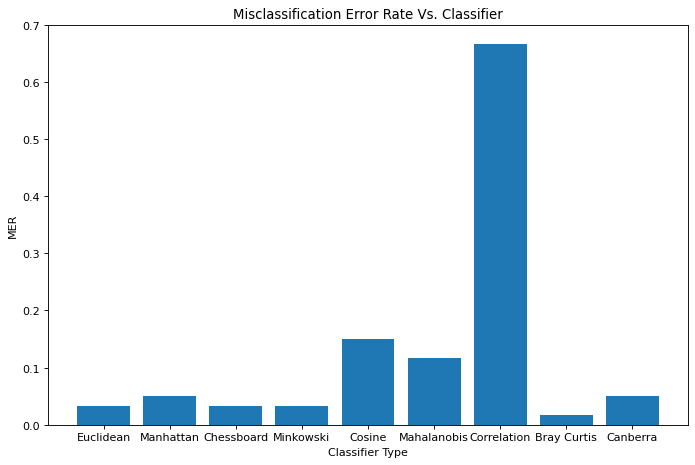

In [43]:
fig = plt.figure(figsize=(8,5), dpi=80)
ax = fig.add_axes([0,0,1,1])
error_type = ['Euclidean', 'Manhattan', 'Chessboard', 'Minkowski', 'Cosine','Mahalanobis','Correlation','Bray Curtis','Canberra']
dt = [euclidean[0],manhattan[0],chessboard[0],minkowski[0],cosine[0],mahalanobis[0],correlation[0],bray_curtis[0],canberra[0]]
ax.bar(error_type,dt)
plt.title("Misclassification Error Rate Vs. Classifier")
plt.xlabel('Classifier Type')  
plt.ylabel('MER')  
plt.show()

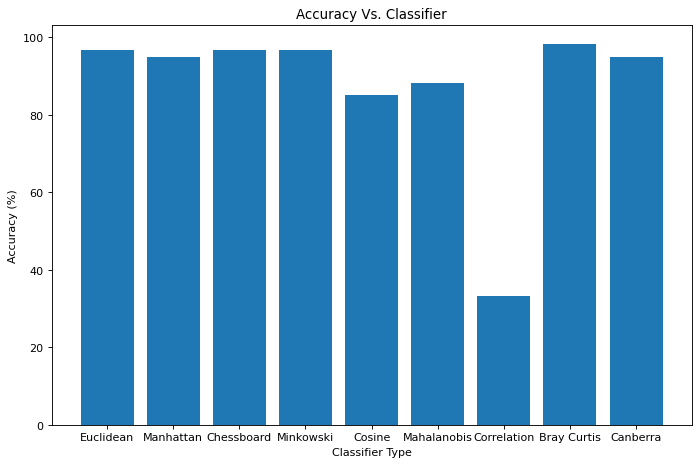

In [44]:
fig = plt.figure(figsize=(8,5), dpi=80)
ax = fig.add_axes([0,0,1,1])
error_type = ['Euclidean', 'Manhattan', 'Chessboard', 'Minkowski', 'Cosine','Mahalanobis','Correlation','Bray Curtis','Canberra']
dt = [euclidean[1],manhattan[1],chessboard[1],minkowski[1],cosine[1],mahalanobis[1],correlation[1],bray_curtis[1],canberra[1]]
ax.bar(error_type,dt)
plt.title("Accuracy Vs. Classifier")
plt.xlabel('Classifier Type')  
plt.ylabel('Accuracy (%)')  
plt.show()